<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice.png' width=300/></center>

# CP1. [실습] 데이터 전처리와 시각화: 타이타닉

- 본 실습은 간단한 데이터 시각화 방법을 직접 체험하기 위한 것입니다.
- 특히 결측치 확인과 처리, 데이터 집계를 다양하게 수행해 봄을 목표로 합니다.
- 손쉽게 자동으로 집계해서 시각화 하는 방법이 있지만 사용하지 않기로 합니다.
- 우선 다음과 같은 과정으로 데이터 시각화를 수행함으로 알고 진행하기 바랍니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/visualization.png' width="650" align="left">

In [0]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline   
%config InlineBackend.figure_format = 'retina'

## 1. 데이터 불러오기

- **read_csv()** 함수를 사용해 분석할 데이터를 csv 파일에서 불러옵니다.
- titanic 데이터 셋은 타이타닉호 사망자와 생존자에 대한 정보입니다.
- titanic_simple 버전이 아닌 정식 titanic 데이터 셋을 사용합니다.
- 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic.csv'

In [0]:
# titanic
f_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic.csv'
titanic = pd.read_csv(f_path)

## 2. 데이터 확인

- 데이터를 알아야 데이터를 분석할 수 있습니다.
- 우선 분석할 데이터가 어떤 형태의 데이터인지 확인합니다.

**[참고] 열 정보**

- survived: 생존 여부
- pclass: 승객의 클래스
- sex: 성별
- sibsp: 형제 혹은 자매의 수
- parch: 부모 혹은 자녀의 수
- fare: 탑승 요금
- embarked: 출발지의 고유 이니셜
- class: 선실의 클래스
- who: male, female을 man, woman으로 표기
- adult_male: 성인 남성 인지 아닌지 여부
- deck: 선실 고유 번호의 가장 앞자리 알파벳(A ~ G)
- embark_town: 출발지
- alive: 생존 여부 데이터를 yes 혹은 no로 표기
- alone: 가족이 없는 경우 True

**1) 상위/하위 데이터 확인**

- head(), tail() 메소드로 상/하위 데이터를 확인합니다.

In [3]:
# 상위 5개 행 확인
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# 하위 5개 행 확인
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


**2) 열 데이터 개수, NaN 값 여부 확인**

- info() 메소드로 각 열의 값 개수, NaN 값 포함 여부를 확인합니다.
- NaN값이 포함되어 있으면 결측치에 대한 해결(제거 또는 변경)이 필요합니다.

In [5]:
# 열 정보, NaN 값 포함 여부 확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


**3) 기초 통계 정보 확인**

- describe() 메소드를 사용해 기초 통계 정보를 확인합니다.

In [6]:
# 기초 통계 정보 확인
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**4) 질문**

- titanic 데이터가 분석하기에 적절한 형태인가요?
- titanic 데이터에 대해 어떤 분석이 의미가 있을까요?
- 분석에 걸림돌이 될 만한 것은 무엇일까요?
- 분석을 위해 우선 어떤 처리를 해야 할까요?

## 3. 데이터 전처리

- NaN 값이 포함된 열이 있으면 제거하거나 다른 값으로 채워야 합니다.
- 중복된 데이터는 정확한 분석을 방해하므로 제거해야 합니다.
- 기타 데이터에 방해가 되는 요소를 전처리 과정에서 제거합니다.

**1) 결측치 처리**

- titanic 데이터 셋에는 NaN 값을 갖는 열이 많습니다.
- 분석에 의미가 없는 열은 제거하고, 필요하면 다른 값으로 체워야 합니다.
- 다음과 같이 막대 그래프로 결측치 상황을 확인할 수 있습니다.

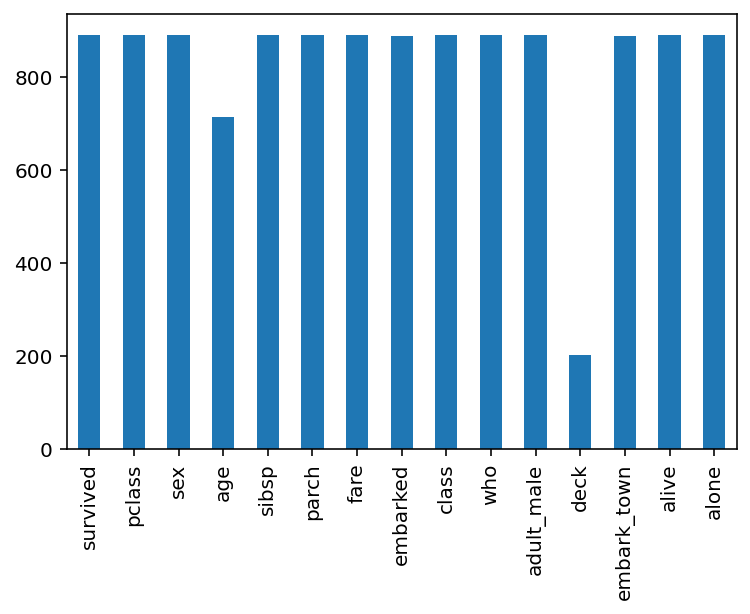

In [7]:
# 막대 그래프로 결측치 확인
titanic.count().plot(kind='bar')
plt.show()

- 또는 다음과 같이 isnull().sum()을 확인해도 된다.

In [8]:
# 결측치 확인
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**deck열 삭제**

- deck열은 결측치 비중이 너무 높으므로 삭제합니다.

In [10]:
# deck열 삭제
titanic.drop('deck', axis=1, inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


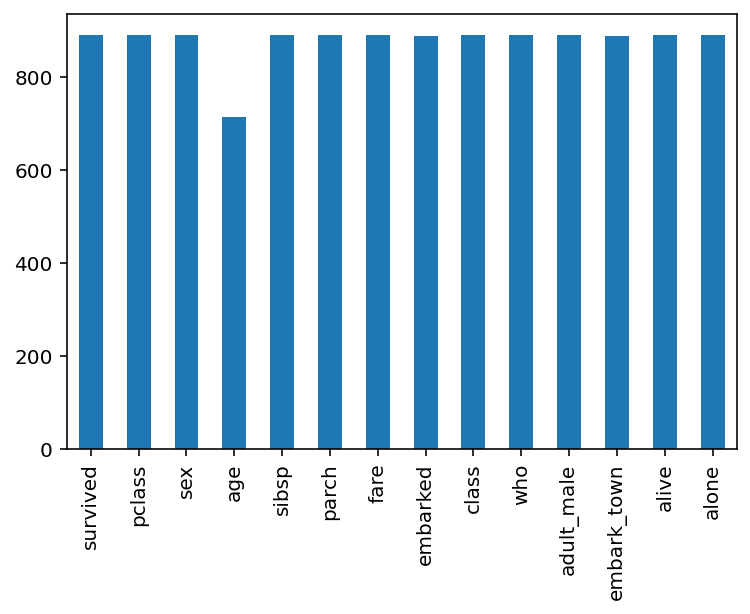

In [11]:
# 막대 그래프로 결측치 확인
titanic.count().plot(kind='bar')
plt.show()

**age열 NaN 값인 행 삭제**

- age열은 분석에 중요한 의미가 있으니 열을 제거하지 말고 NaN 값인 행을 제거합니다.

In [14]:
# age 열 NaN 값인 열 삭제
titanic.dropna(subset=['age'], inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


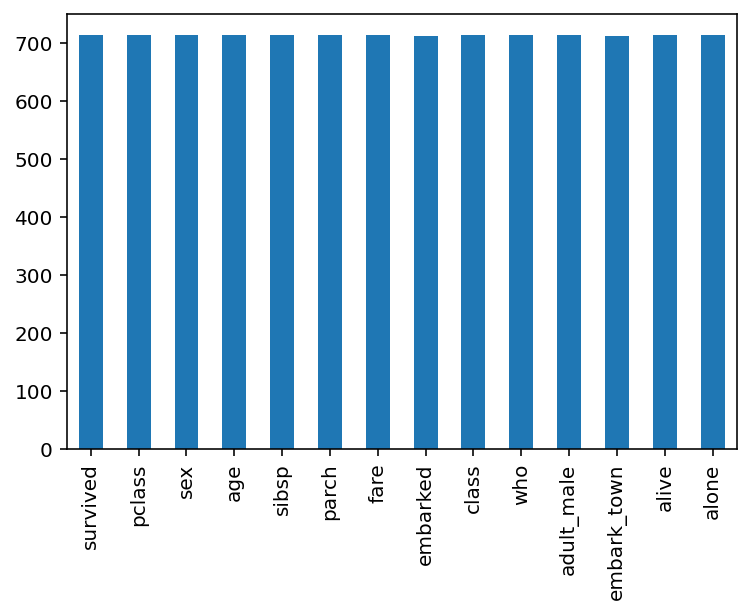

In [15]:
# 막대 그래프로 결측치 확인
titanic.count().plot(kind='bar')
plt.show()

**3) 불필요한 열 제거**

- 분석에 불필요한 열은 과감히 제거합니다.
- survived, pclass, sex, age, fare 열만 사용하기로 합니다.

In [27]:
# survived, pclass, sex, age, fare 열만 사용
titanic = titanic[['survived', 'pclass', 'sex', 'age', 'fare']].copy()

# 확인
titanic.head()

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


## 4. 데이터 추가

- age 열의 값을 기준으로 10대, 20대, 30대...로 구분하는 열을 추가합니다.
- age 열의 값을 10으로 나눈 몫에 다시 10을 곱하면 되며, 정수형이 되게 합니다.
- 추가되는 열 이름은 **age2**로 합니다.

In [28]:
# age2 열 추가
titanic['age2'] = ((titanic['age'] // 10) * 10).astype(int)

# 확인
titanic.head()

,survived,pclass,sex,age,fare,age2
0,0,3,male,22.0,7.2500,20
1,1,1,female,38.0,71.2833,30
2,1,3,female,26.0,7.9250,20
3,1,1,female,35.0,53.1000,30
4,0,3,male,35.0,8.0500,30


## 5. 데이터 시각화

- 이제 전처리가 진행된 데이터를 시각화해서 분석합니다.

**1) 남녀별 생존자 수 비교**

- groupby() 메소드를 사용해 남녀별로 생존자 수를 집계하여 **bar chart**로 비교해 봅니다.
- 생존자 수는 survived 열의 합으로 확인할 수 있습니다.

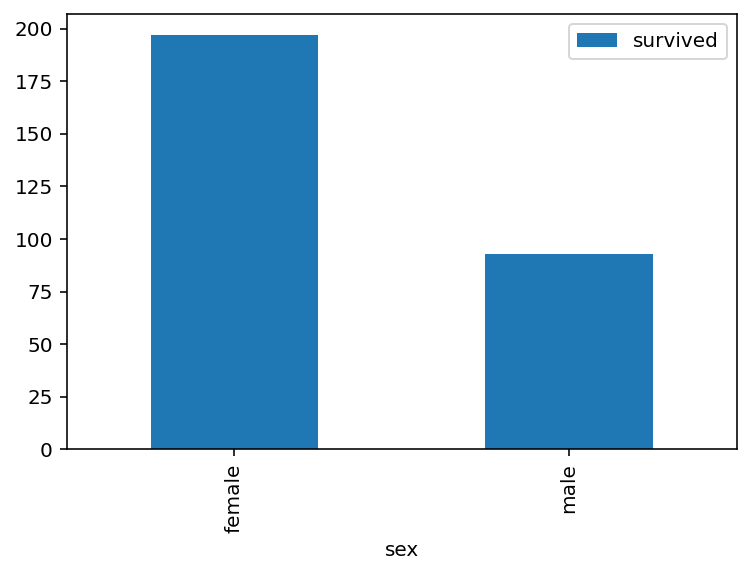

In [29]:
# 남녀별 생존자수 비교
titanic.groupby(by=['sex'], as_index=False)['survived'].sum().plot(kind='bar', x='sex', y='survived')
plt.show()

**2) 클래스별 생존자 수 비교**

- groupby() 메소드를 사용해 클래스별로 생존자 수를 집계해 **bar chart**로 비교해 봅니다.

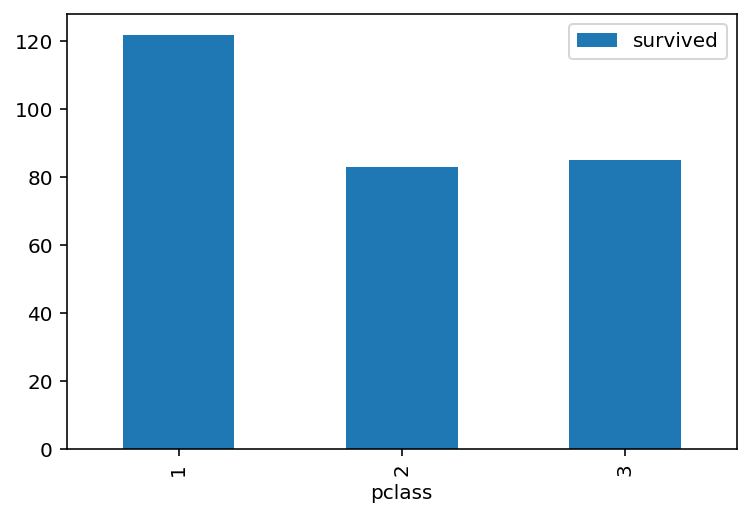

In [31]:
# 클래스별 생존자수 비교
titanic.groupby(by=['pclass'], as_index=False)['survived'].sum().plot(kind='bar', x='pclass', y='survived')
plt.show()

**3) 클래스별 운임 비교**

- groupby() 메소드를 사용해 클래스별로 운임 합을 집계해 **bar chart**로 비교해 봅니다.

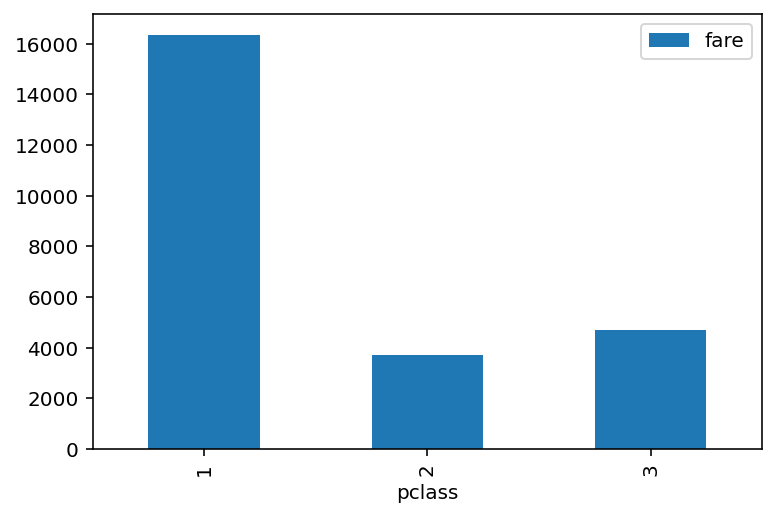

In [32]:
# 클래스 별 생존자수 비교
titanic.groupby(by=['pclass'], as_index=False)['fare'].sum().plot(kind='bar', x='pclass', y='fare')
plt.show()

**4) 연령별 생존자 수 비교**

- groupby() 메소드를 사용해 연령별 생존자 수를 집계해 **bar chart**로 비교해 봅니다.
- 앞에서 새로 추가한 age2 열을 사용합니다.

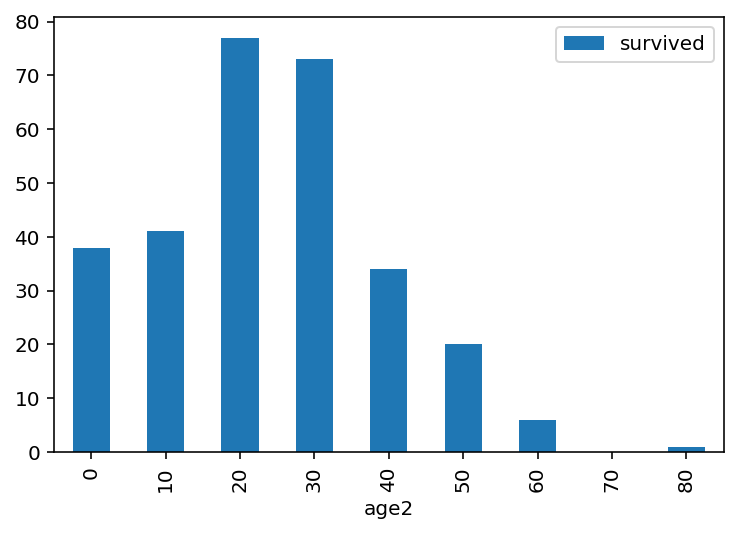

In [34]:
# 연령별 생존자수 비교
titanic.groupby(by=['age2'], as_index=False)['survived'].sum().plot(kind='bar', x='age2', y='survived')
plt.show()

**5) [옵션] 연령별 남녀별 생존자 수 비교**

- 연령별 남녀 생존자 수가 궁금합니다.
- 남자 연령별 생존자 수, 여자 연령별 생존자 수를 구해 합쳐봅니다.
- 우선 남자 연령별 생존자 수를 갖는 **age_male** 데이터프레임을 만듭니다.

In [44]:
# 남자 연령별 생존자 수
age_male = titanic[titanic['sex'] == 'male'].groupby(by=['age2'], as_index=False)['survived'].sum()

# 확인
age_male.head()

,age2,survived
0,0,19
1,10,7
2,20,25
3,30,23
4,40,12


- 여자 생존자 수를 갖는 **age_female** 데이터프레임을 만듭니다.

In [45]:
# 여자 연령별 생존자 수
age_female = titanic[titanic['sex'] == 'female'].groupby(by=['age2'], as_index=False)['survived'].sum()

# 확인
age_female.head()

,age2,survived
0,0,19
1,10,34
2,20,52
3,30,50
4,40,22


- 두 데이터프레임의 survived 열 이름이 같으니 구분되게 male_survived, female_survived로 각각 바꿉니다.

In [0]:
# 열 이름 변경
age_male.rename(columns={'survived': 'male_survived'}, inplace=True)
age_female.rename(columns={'survived': 'female_survived'}, inplace=True)

- 두 데이터프레임을 concat() 함수로 연결해 **age_mf** 데이터프레임을 만듭니다.

In [49]:
# concat() 함수로 연결
age_mf = pd.concat([age_male, age_female['female_survived']], axis=1)

# 확인
age_mf.head()

,age2,male_survived,female_survived
0,0,19,19.0
1,10,7,34.0
2,20,25,52.0
3,30,23,50.0
4,40,12,22.0


- 이제 bar chart로 분석을 하면 됩니다.

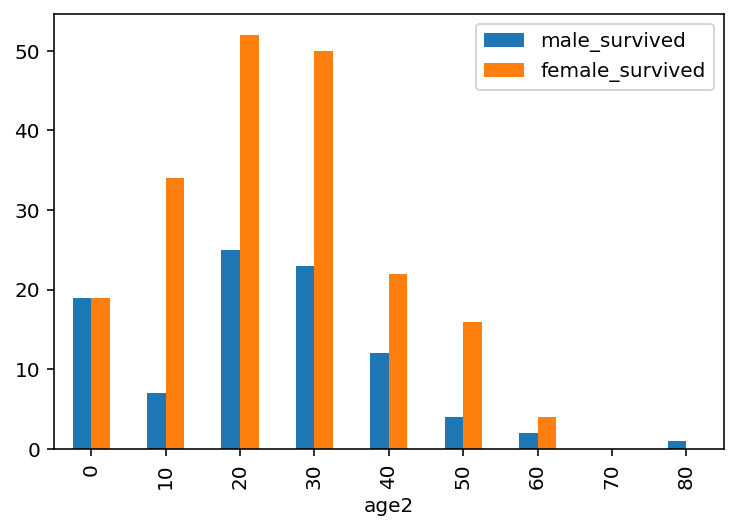

In [53]:
# 연령별 남녀별 생존자수 비교
age_mf.plot(kind='bar', x='age2', y=['male_survived', 'female_survived'])
plt.show()

- 누적 막대그래프로 표시하면 의미가 있을 것 같습니다.

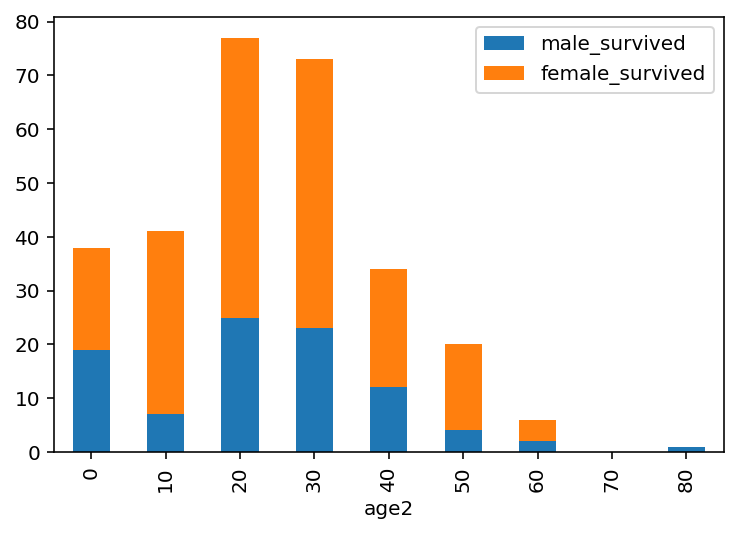

In [54]:
# 누적 막대그래프 표시
age_mf.plot(kind='bar', x='age2', y=['male_survived', 'female_survived'], stacked=True)
plt.show()

## 6. 의미 찾기

- 데이터 분석을 제대로 하려면 제대로된 데이터가 있어야 합니다.
- 다양한 전처리 방법을 사용해 분석이 용이한 형태로 데이터를 변경해야 합니다.
- 기존 데이터를 활용해 새로운 데이터를 만들 수 있어야 합니다.
- 원본 데이터를 대상으로 집계한 후 그 결과를 분석하는 것도 의미가 있습니다.

## <center>수고하셨습니다.</center>
<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/end.png' width=200/></center>